# Initial Analyses (Single Subject)
## Computational Methods in Psychology and Neuroscience
### Psychology 4215/7215 --- Fall 2023
By: Per B. Sederberg, PhD



# Lesson Objectives

Upon completion of this lesson, students should have learned:

1. Read in some real data
2. Perform some simple data clean-up
3. Some visualizations with Pandas
4. Simple statistics with SciPy and StatsModels



# Deep Dive Into Single Subj

- Let's explore one subject's data and learn stuff along the way!
- Where are the data?
  - data, exp_name, subject, session, slogs

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from smile.log import log2dl

In [4]:
# load in the slog to a DictList
dl = log2dl('log_flanker_0.slog')
dl[:2]

[{'resp_map_left': 'F',
  'resp_map_right': 'J',
  'block_num': 0,
  'trial_num': 0,
  'stim_on_time': 375067.992279476,
  'stim_on_error': 0.0,
  'resp': 'J',
  'resp_time_time': 375068.774703632,
  'resp_time_error': 0.00060913001652807,
  'rt': 0.7824241559719667,
  'correct': True,
  'location_0': 842.6509560580856,
  'location_1': 799.3799389961,
  'log_time': 375069.657998812,
  'condition': 'incongruent',
  'direction': 'right',
  'stimulus': '<<<><<<',
  'log_num': 0},
 {'resp_map_left': 'F',
  'resp_map_right': 'J',
  'block_num': 0,
  'trial_num': 1,
  'stim_on_time': 375069.665125297,
  'stim_on_error': 0.0,
  'resp': 'J',
  'resp_time_time': 375070.321047353,
  'resp_time_error': 0.0002803419774863869,
  'rt': 0.6559220560011454,
  'correct': True,
  'location_0': 1642.2509552380766,
  'location_1': 613.5382275593947,
  'log_time': 375070.93016192334,
  'condition': 'congruent',
  'direction': 'right',
  'stimulus': '>>>>>>>',
  'log_num': 0}]

In [5]:
# turn the DictList into a DataFrame
df = pd.DataFrame(dl)
df.head()

,resp_map_left,resp_map_right,block_num,trial_num,stim_on_time,stim_on_error,resp,resp_time_time,resp_time_error,rt,correct,location_0,location_1,log_time,condition,direction,stimulus,log_num
0,F,J,0,0,375067.992279,0.0,J,375068.774704,0.000609,0.782424,True,842.650956,799.379939,375069.657999,incongruent,right,<<<><<<,0
1,F,J,0,1,375069.665125,0.0,J,375070.321047,0.000280,0.655922,True,1642.250955,613.538228,375070.930162,congruent,right,>>>>>>>,0
2,F,J,0,2,375070.948564,0.0,J,375071.589764,0.000398,0.641200,True,1539.258541,689.599330,375072.498972,incongruent,right,<<<><<<,0
3,F,J,0,3,375072.516730,0.0,J,375073.041845,0.000388,0.525115,True,1577.772055,749.247220,375073.902002,congruent,right,>>>>>>>,0
4,F,J,0,4,375073.910833,0.0,F,375074.683834,0.000257,0.773001,True,1072.496985,863.688477,375075.232140,incongruent,left,>>><>>>,0


## System Info

Often we may need some information about the computer where a task was run. SMILE saves out a `sysinfo.slog` with some useful info:

In [7]:
sinfo = log2dl('sysinfo.slog')[0]
sinfo

{'fullscreen': None,
 'locked': 1,
 'density': '2.1515',
 'font_size': 45.0,
 'font_name': 'Roboto',
 'frame_rate': 60.0,
 'default_data_dir': './data',
 'data_time': '20211020_090742',
 'debug': False,
 'resolution': None,
 'background_color': None,
 'scale_box_0': 1024,
 'scale_box_1': 768,
 'scale_up': True,
 'scale_down': True,
 'expname': 'Flanker',
 'processor': '',
 'python_version': '3.9.7',
 'system': 'Linux',
 'version': '',
 'author': '',
 'email': '',
 'date_last_update': '',
 'uname_0': 'Linux',
 'uname_1': 'thin',
 'uname_2': '5.10.0-2-amd64',
 'uname_3': '#1 SMP Debian 5.10.9-1 (2021-01-20)',
 'uname_4': 'x86_64',
 'uname_5': '',
 'screen_size_0': 2560,
 'screen_size_1': 1440,
 'scale_factor': 0.8714849836747274,
 'log_num': 0}

## Some data clean-up

In [8]:
# calculate change in x from previous location
df['dx'] = np.concatenate([[np.nan], 
                np.array(df['location_0'][1:]) - 
                np.array(df['location_0'][:-1])])

# calculate the offset from the center
df['x_offset'] = df['location_0'] - sinfo['screen_size_0']/2

# save the log(rt)
df['log_rt'] = np.log(df['rt'])

# create a correct response column b/c we didn't save it
df['correct_resp'] = df['resp']
df.loc[~df['correct'] & (df['resp']=='F'), 'correct_resp'] = 'J'
df.loc[~df['correct'] & (df['resp']=='J'), 'correct_resp'] = 'F'

df.head()

,resp_map_left,resp_map_right,block_num,trial_num,stim_on_time,stim_on_error,resp,resp_time_time,resp_time_error,rt,...,location_1,log_time,condition,direction,stimulus,log_num,dx,x_offset,log_rt,correct_resp
0,F,J,0,0,375067.992279,0.0,J,375068.774704,0.000609,0.782424,...,799.379939,375069.657999,incongruent,right,<<<><<<,0,NaN,-437.349044,-0.245358,J
1,F,J,0,1,375069.665125,0.0,J,375070.321047,0.000280,0.655922,...,613.538228,375070.930162,congruent,right,>>>>>>>,0,799.599999,362.250955,-0.421713,J
2,F,J,0,2,375070.948564,0.0,J,375071.589764,0.000398,0.641200,...,689.599330,375072.498972,incongruent,right,<<<><<<,0,-102.992414,259.258541,-0.444414,J
3,F,J,0,3,375072.516730,0.0,J,375073.041845,0.000388,0.525115,...,749.247220,375073.902002,congruent,right,>>>>>>>,0,38.513514,297.772055,-0.644138,J
4,F,J,0,4,375073.910833,0.0,F,375074.683834,0.000257,0.773001,...,863.688477,375075.232140,incongruent,left,>>><>>>,0,-505.275070,-207.503015,-0.257475,F


## Statistics in Python

- Once your data are in a nice tabular form, you are all set to start asking questions
- In this section we'll introduce:
  - Grouping and visualization with Pandas
  - Statistics with SciPy
  - Simple Statistics with StatsModels

## Stats in SciPy

- Many useful statistics are available from [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)

In [9]:
import numpy as np
from scipy import stats

## Checking for performance easy conditions

- One test to make sure participants are trying during the task is to check performance on the easy conditions
- ***Question: Did they perform above chance on the congruent condition?***

In [10]:
# we can calculate mean performance, but is it significant?
df.loc[df['condition']=='congruent', 'correct'].mean()

1.0

## The binomial test

- We need to take into account the number of problems
- and whether they did significantly above what could be expected by chance
- The binomal tests this for specific probabilities with *two* outcomes
  - Like flipping a coin and determining whether it is fair or biased

In [14]:
# generate some random data
dat = np.random.choice([0, 1], size=64, p=[0.3, 0.7])
print(dat)

# calculate whether it deviates from chance
stats.binomtest(dat.sum(), len(dat), p=0.5)

[0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]


BinomTestResult(k=44, n=64, alternative='two-sided', statistic=0.6875, pvalue=0.0036899642765400487)

In [19]:
# determine number correct and total number of congruent trials
df_con = df.loc[df['condition']=='congruent', 'correct']
num_correct = df_con.sum()
num_tries = len(df_con)

# perform the statistic
res = stats.binomtest(num_correct, n=num_tries, 
                         p=0.5, alternative='greater')
prop_correct = num_correct/num_tries

# report the results (with some string formatting)
print('Prop correct: {:0.3f} (p={:0.4f})'.format(prop_correct, res.pvalue))

Prop correct: 1.000 (p=0.0000)


## Deeper Dive into Flanker

- The typical congruency effect is that participants show lower accuracy and/or slower reaction times in the incongruent relative to the congruent conditions
- Let's check that for our participant!

In [21]:
# show the stim conditions
df.groupby('condition')['stimulus'].unique()

condition
congruent      [>>>>>>>, <<<<<<<]
incongruent    [<<<><<<, >>><>>>]
mix            [><<><<>, <>><>><]
Name: stimulus, dtype: object

In [22]:
# look at mean performance by condition
df.groupby(['condition'])['correct'].mean()

condition
congruent      1.00000
incongruent    1.00000
mix            0.96875
Name: correct, dtype: float64

In [23]:
# how about RT by condition?
df.groupby(['condition'])['rt'].mean()

condition
congruent      0.586320
incongruent    0.707788
mix            0.727889
Name: rt, dtype: float64

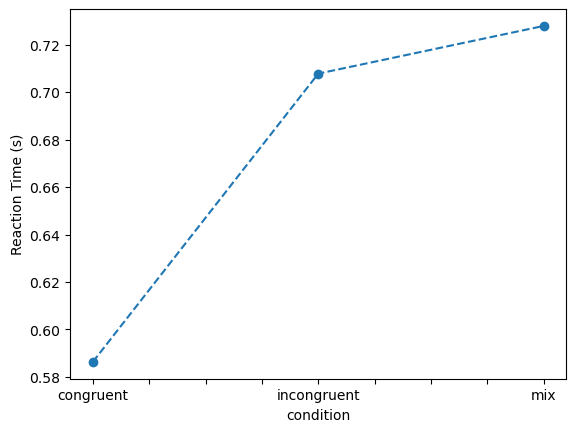

In [25]:
# we can visulize these values
df.groupby('condition')['rt'].mean().plot(style='o--')
plt.ylabel('Reaction Time (s)');

## *t*-test to compare distributions

- The *t*-test assesses whether two normal distributions are the same (or whether one distribution is different from a fixed value)
- Assumes your data are independent and normally distributed
- There are both paired (1-sample) and non-paired (independent) versions of the t-test available in scipy

<Axes: >

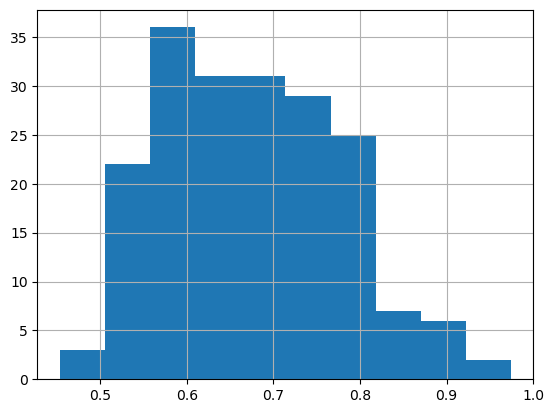

In [26]:
# how do our RTs look?
df['rt'].hist(bins='auto')

<Axes: >

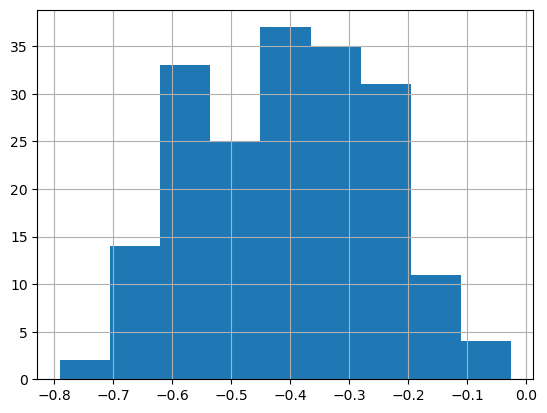

In [27]:
# how about if we take the log?
np.log(df['rt']).hist(bins='auto')

## Boxplots get you closer to your data

- While it's hard to look at individual data points, it can still be very useful to visualize your data
- A box plot is a non-parametric visualization of your data with the:
  - Minimum (excluding outliers) as the lower whisker
  - Maximum (excluding outliers) as the upper whisker
  - Median (50% quantile) line inside the box
  - 25% and 75% quantile of your data as the upper and lower box sides
  - Outliers as dots

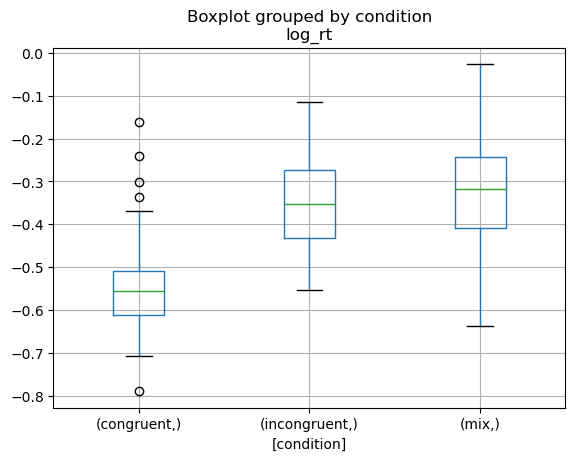

In [29]:
# visualization of the comparison
df.boxplot(column=['log_rt'], by=['condition']);

## Let's run an independent samples t-test

In [30]:
# we can check for statistical signficance of RTs
# with an unpaired independent samples t-test
stats.ttest_ind(df[df['condition']=='congruent']['log_rt'],
                df[df['condition']=='incongruent']['log_rt'])


TtestResult(statistic=-9.763299870748329, pvalue=4.1326128607693134e-17, df=126.0)

In [31]:
# are the mixed slower than incongruent?
stats.ttest_ind(df[df['condition']=='incongruent']['log_rt'],
                df[df['condition']=='mix']['log_rt'])


TtestResult(statistic=-1.1658750847528527, pvalue=0.24586712446147393, df=126.0)

## Non-parametric statistics

- There is an entire sub-field of statistics dedicated to situations where you can not assume your data come from normal distributions.
- Here, the approach is to turn the values into ranks and test whether the mean *ranks* are different.
- There are both paired (signed-rank test) and un-paired versions (Mann-Whitney U test) available in scipy.

In [32]:
# perform the non-paired non-parametric test on RTs
stats.mannwhitneyu(df[df['condition']=='mix']['rt'],
                   df[df['condition']=='incongruent']['rt'])

MannwhitneyuResult(statistic=2310.0, pvalue=0.21269125271992617)

## Regression and beyond!

- More complicated questions require more complicated models
- The most standard approach in statistics is regression:

![](https://scipy-lectures.org/_images/math/8c27948834377cd91a6907f91d1f87acb32f1817.png)

- Here `y` is the dependent variable and `x` is the independent variable.
- These are also often called *endogenous* and *exogenous*.

## Statsmodels allows us to specify regressions as formulas

- There are many ways to fit regression models that often depend on your dependent data
  - e.g., ordinary least squares vs. logistic regression

In [56]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

***Question: Are there differences in accuracy between conditions?***

In [35]:
# dependent variables can't be boolean
df['correct_int'] = df['correct'].astype(int)

# build a logistic regression
model = smf.logit("correct_int ~ condition", df).fit()
model.summary()

         Current function value: 0.046354
         Iterations: 35


/home/per/anaconda3/envs/smiledev/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            correct_int   No. Observations:                  192
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                  0.1995
Time:                        19:59:26   Log-Likelihood:                -8.8999
converged:                      False   LL-Null:                       -11.118
Covariance Type:            nonrobust   LLR p-value:                    0.1088
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   24.8517   3.11e+04      0.001      0.999    -6.1e+04    6.11e+04
condition[T.incongruent]     1.2413   6.58e+04   1.89e-05      1.000   -1.29e+05    1.29e+05
condition[T.mix]           -21.4177   3.11e+04     -0.001      0.999   -6.11e+04     6.1e+04
============================================================================================

Possibly complete quasi-separation: A fraction 0.67 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

***Question: Can we test for differences in RTs between conditions with regression?***

In [67]:
# build a linear regression
model = smf.ols("log_rt ~ condition", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_rt   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     62.91
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.15e-21
Time:                        13:24:14   Log-Likelihood:                 139.24
No. Observations:                 192   AIC:                            -272.5
Df Residuals:                     189   BIC:                            -262.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.5404      0.015    -36.609      0.000      -0.570      -0.511
condition[T.incongruent]     0.1892      0.021      9.064      0.000       0.148       0.230
condition[T.mix]             0.2141      0.021     10.254      0.000       0.173       0.255
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                2.861
Skew:                           0.280   Prob(JB):                        0.239
Kurtosis:                       3.212   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Testing Specific Contrasts with an f_test

Linear models are built to estimate coefficients, but follow-up tests are possible without rerunning the model.

In [68]:
# You can build a contrast yourself
model.f_test([0, 1, -1])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.4172399166052396, p=0.23535134145536532, df_denom=189, df_num=1>

In [69]:
# or use specify the contrast with words
# print out our params
model.params

Intercept                  -0.540406
condition[T.incongruent]    0.189220
condition[T.mix]            0.214072
dtype: float64

In [70]:
# make the contrast with named params
model.f_test("condition[T.incongruent] = condition[T.mix]")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.4172399166052396, p=0.23535134145536532, df_denom=189, df_num=1>

In [71]:
# Remember the intercept is the first condition alphabetically
model.f_test("Intercept = condition[T.mix]")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=522.4696542987477, p=2.668247452695619e-56, df_denom=189, df_num=1>

## Simon Effect

If the stimulus is on the same side as the response you get facilitation, if it's on the opposite side, you get inhibition.

Our version of flanker had the simulus moving around the screen randomly. How can we test for the Simon effect?


<Axes: >

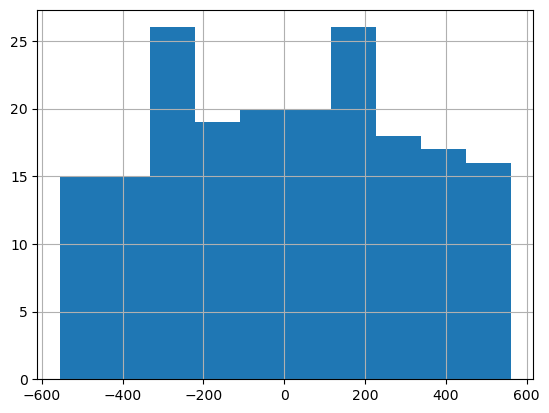

In [50]:
# Let's see the distribution of offsets relative to center
df['x_offset'].hist()

## Seaborn has a really cool function for visualizing linear models

Install with:

`conda install -c conda-forge seaborn`

In [51]:
import seaborn as sns

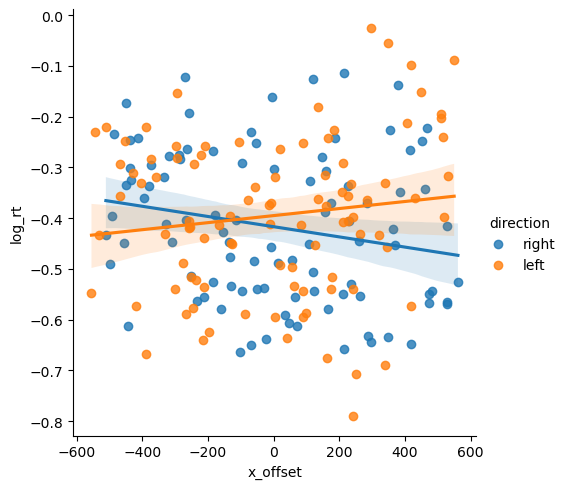

In [52]:
sns.lmplot(y='log_rt', x='x_offset', hue='direction', data=df)

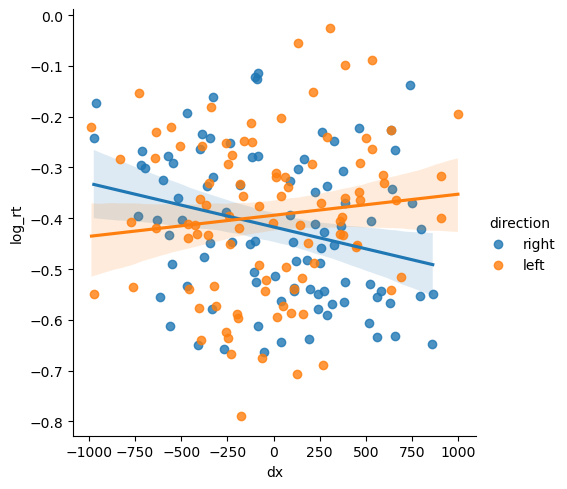

In [53]:
sns.lmplot(y='log_rt', x='dx', hue='direction', data=df)

In [77]:
# build a linear regression
model = smf.ols("log_rt ~ dx*direction", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_rt   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.984
Date:                Thu, 05 Oct 2023   Prob (F-statistic):             0.0325
Time:                        13:26:33   Log-Likelihood:                 94.322
No. Observations:                 191   AIC:                            -180.6
Df Residuals:                     187   BIC:                            -167.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.3942      0.015    -25.857      0.000      -0.424      -0.364
direction[T.right]       -0.0230      0.022     -1.065      0.288      -0.066       0.020
dx                     4.156e-05   3.57e-05      1.165      0.245   -2.88e-05       0.000
dx:direction[T.right]    -0.0001   4.94e-05     -2.586      0.010      -0.000   -3.03e-05
==============================================================================
Omnibus:                        2.810   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                2.052
Skew:                           0.067   Prob(JB):                        0.358
Kurtosis:                       2.510   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Evaluating models with ANOVA

Linear models are also ANOVA models. You can test for main and interaction effects without refitting the model. Take care to select the most appropriate *type* of anova (1, 2, or 3) for the question you are asking. Usually you will want either Type 2 or Type 3.

In [78]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
direction,0.025281,1.0,1.135054,0.288073
dx,0.023036,1.0,1.034272,0.310471
dx:direction,0.148982,1.0,6.688905,0.010462
Residual,4.165051,187.0,NaN,NaN


In [79]:
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,14.891043,1.0,668.569281,1.174041e-63
direction,0.025275,1.0,1.134788,2.881299e-01
dx,0.030255,1.0,1.358364,2.453056e-01
dx:direction,0.148982,1.0,6.688905,1.046159e-02
Residual,4.165051,187.0,NaN,NaN


## Assignment before next class

- Run in the Flanker experiment and post the data on Canvas
  - Due by ***Tuesday***
- Test for the Simon effect in your data
  - Due on ***Thursday*** next week

### See you next week!!!